Train on 10000 samples, validate on 10000 samples
Epoch 1/15
10000/10000 [==============================] - 11s 1ms/step - loss: 0.9608 - acc: 0.6794 - val_loss: 0.2564 - val_acc: 0.9292
Epoch 2/15
10000/10000 [==============================] - 9s 939us/step - loss: 0.5767 - acc: 0.8209 - val_loss: 0.2122 - val_acc: 0.9430
Epoch 3/15
10000/10000 [==============================] - 9s 931us/step - loss: 0.4851 - acc: 0.8497 - val_loss: 0.1764 - val_acc: 0.9489
Epoch 4/15
10000/10000 [==============================] - 9s 935us/step - loss: 0.4274 - acc: 0.8680 - val_loss: 0.1581 - val_acc: 0.9539
Epoch 5/15
10000/10000 [==============================] - 9s 918us/step - loss: 0.4014 - acc: 0.8698 - val_loss: 0.1464 - val_acc: 0.9572
Epoch 6/15
10000/10000 [==============================] - 9s 929us/step - loss: 0.3853 - acc: 0.8771 - val_loss: 0.1369 - val_acc: 0.9587
Epoch 7/15
10000/10000 [==============================] - 10s 951us/step - loss: 0.3565 - acc: 0.8881 - val_loss: 0.1412 - 

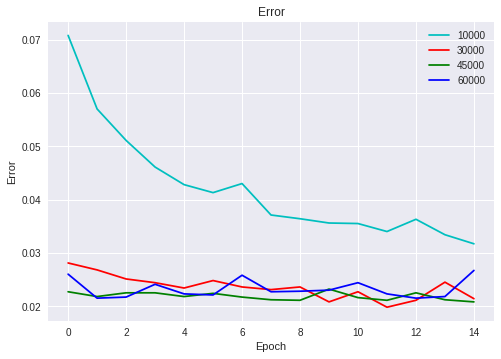

In [9]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# load training data and do basic data normalization
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

filters = 8
kernel_size = 3
pool_size = 2
dense_layer_sizes = [32]
model = Sequential()
model.add(Conv2D(filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
for layer_size in dense_layer_sizes:
    model.add(Dense(layer_size))
    model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

import matplotlib.pyplot as plt

x_train_cut = x_train[:10000]
y_train_cut = y_train[:10000]
history = model.fit(x_train_cut, y_train_cut, validation_data = (x_test, y_test), epochs=15, batch_size=16, verbose=1)
#plt.plot([1 - i for i in history.history['acc']])
plt.plot([1 - i for i in history.history['val_acc']], 'c')

x_train_cut = x_train[:30000]
y_train_cut = y_train[:30000]
history = model.fit(x_train_cut, y_train_cut, validation_data = (x_test, y_test), epochs=15, batch_size=16, verbose=1)
#plt.plot([1 - i for i in history.history['acc']])
plt.plot([1 - i for i in history.history['val_acc']], 'r')

x_train_cut = x_train[:45000]
y_train_cut = y_train[:45000]
history = model.fit(x_train_cut, y_train_cut, validation_data = (x_test, y_test), epochs=15, batch_size=16, verbose=1)
#plt.plot([1 - i for i in history.history['acc']])
plt.plot([1 - i for i in history.history['val_acc']], 'g')

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=15, batch_size=16, verbose=1)
#plt.plot([1 - i for i in history.history['acc']])
plt.plot([1 - i for i in history.history['val_acc']], 'b')

plt.title('Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['10000', '30000', '45000', '60000'], loc='upper right')
plt.show()